# Can you predict the type of a dry bean from its shape features?



## Data fields
* <b>ID -</b> an ID for this instance<br>
* <b>Area - (A)</b>, The area of a bean zone and the number of pixels within its boundaries.<br>
* <b>Perimeter - (P)</b>, Bean circumference is defined as the length of its border.<br>
* <b>MajorAxisLength - (L)</b>, The distance between the ends of the longest line that can be drawn from a bean.<br>
* <b>MinorAxisLength - (l)</b>, The longest line that can be drawn from the bean while standing perpendicular to the main axis.<br>
* <b>AspectRatio - (K)</b>, Defines the relationship between L and l.<br>
* <b>Eccentricity - (Ec)</b>, Eccentricity of the ellipse having the same moments as the region.<br>
* <b>ConvexArea - (C)</b>, Number of pixels in the smallest convex polygon that can contain the area of a bean seed.<br>
* <b>EquivDiameter - (Ed)</b>, The diameter of a circle having the same area as a bean seed area.<br>
* <b>Extent - (Ex)</b>, The ratio of the pixels in the bounding box to the bean area.<br>
* <b>Solidity - (S)</b>, Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.<br>
* <b>Roundness - (R)</b>, Calculated with the following formula: (4piA)/(P^2)<br>
* <b>Compactness - (CO)</b>, Measures the roundness of an object: Ed/L<br>
* <b>ShapeFactor1 - (SF1)</b><br>
* <b>ShapeFactor2 - (SF2)</b><br>
* <b>ShapeFactor3 - (SF3)</b><br>
* <b>ShapeFactor4 - (SF4)</b><br>
* <b>y -</b> the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.<br>

# Import the libraries

In [16]:
## for data
import pandas as pd
import numpy as np
import os

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns


## for processing
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


## For Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

## For Evaluation
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report
from sklearn.metrics import classification_report


## Get the Data

In [2]:
DATA_PATH="./Datasets/"
data = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))


# Clean the Data

In [3]:
data.isnull().sum(axis=0)

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

## Explore the Data

In [4]:
print("Shape",data.shape)
print("-----------------------")
print(data.info())


Shape (10834, 18)
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4    

In [5]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


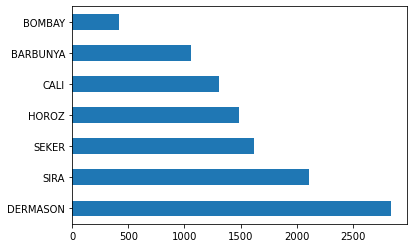

In [6]:
data["y"].value_counts().plot(kind='barh');

In [7]:
copy=data.copy()

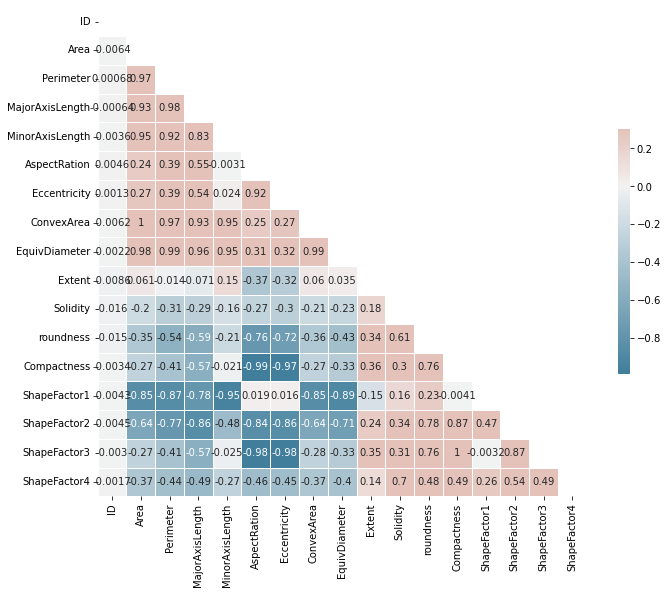

In [8]:
corr_matrix=data.corr()
mask=np.triu(np.ones_like(corr_matrix,dtype=bool))
fig,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr_matrix,mask=mask,cmap=cmap,vmax=.3,center=0,annot=True,
           square=True,linewidths=.5,cbar_kws={'shrink':.5});

## Insights form the heatmap
Some features have correlation = 1 with each other so we can safely drop one of them
* <b>ConvexArea and Area</b>
* <b>ShapeFactor 3 and Compactness</b>


Some feature have correlation almost equal to -1 (-0.99,-0.98) , we can also choose to drop one of them or take pca
* <b> AscpectRatio and Compactness</b>
* <b> AscpectRatio and ShapeFactor 3</b>
* <b> MajorAxisLength and Perimeter</b>
* <b> Perimeter and Area</b>
* <b> EquivDiameter and Area</b>
* <b> EquivDiameter and Perimeter</b>
* <b> Eccentricity and ShapeFactor 3</b>

In [9]:
df = data.copy()
df.drop("ID",axis=1,inplace=True)
columns_to_drop  = ['Area','EquivDiameter','ShapeFactor3','Perimeter','AspectRation'
                   ,'MinorAxisLength','Compactness']

df.drop(columns_to_drop,axis=1,inplace=True)

### Handling Numerical Attributes

In [10]:
Num_Training_data=df.drop(columns=["y"])

In [11]:
# Scale the features
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
Num_Training_data_Scaled = scaler.fit_transform(Num_Training_data.astype(np.float64))
train=pd.DataFrame(Num_Training_data_Scaled,columns=Num_Training_data.columns)
df.reset_index(inplace=True)
train['y']=df['y']
X=train

## Handling Imbalanced Data

In [12]:
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight('balanced',np.unique(X["y"]),X["y"])

zip_iterator = zip(set(X['y']), weight)


a_dictionary = dict(zip_iterator)
a_dictionary

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA'], y=0           HOROZ
1           SEKER
2        DERMASON
3        DERMASON
4            SIRA
           ...   
10829       SEKER
10830    DERMASON
10831        CALI
10832        SIRA
10833    DERMASON
Name: y, Length: 10834, dtype: object as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'BARBUNYA': 1.4642519259359372,
 'HOROZ': 3.702665755297334,
 'BOMBAY': 1.186897458369851,
 'SIRA': 0.5455461000050355,
 'SEKER': 1.0401305683563749,
 'DERMASON': 0.9547898122851856,
 'CALI': 0.7338616812301023}

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
for train_index, test_index in split.split(X, X['y']):
    strat_train_set = X.loc[train_index]
    strat_test_set = X.loc[test_index]


X_train  = strat_train_set.iloc[:,:-1]
y_train = strat_train_set.iloc[:,-1]
X_test  = strat_test_set.iloc[:,:-1]
y_test = strat_test_set.iloc[:,-1]


## Model

### LGBMClassifier

In [17]:
lgb=lgb.LGBMClassifier(random_state=42)
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[2,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03,.04,.05,.06]}
#Define the scoring
clf=RandomizedSearchCV(lgb,parameters,scoring='f1_micro')
clf.fit(X=X_train, y=y_train)


RandomizedSearchCV(estimator=LGBMClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_child_samples': [5, 10, 15],
                                        'num_leaves': [20, 40, 60, 80, 100],
                                        'reg_alpha': [0, 0.01, 0.03, 0.04, 0.05,
                                                      0.06]},
                   scoring='f1_micro')

classification report:

               precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00       740
      BOMBAY       1.00      1.00      1.00       292
        CALI       1.00      1.00      1.00       913
    DERMASON       0.98      0.98      0.98      1986
       HOROZ       1.00      1.00      1.00      1041
       SEKER       1.00      1.00      1.00      1135
        SIRA       0.97      0.97      0.97      1476

    accuracy                           0.99      7583
   macro avg       0.99      0.99      0.99      7583
weighted avg       0.99      0.99      0.99      7583



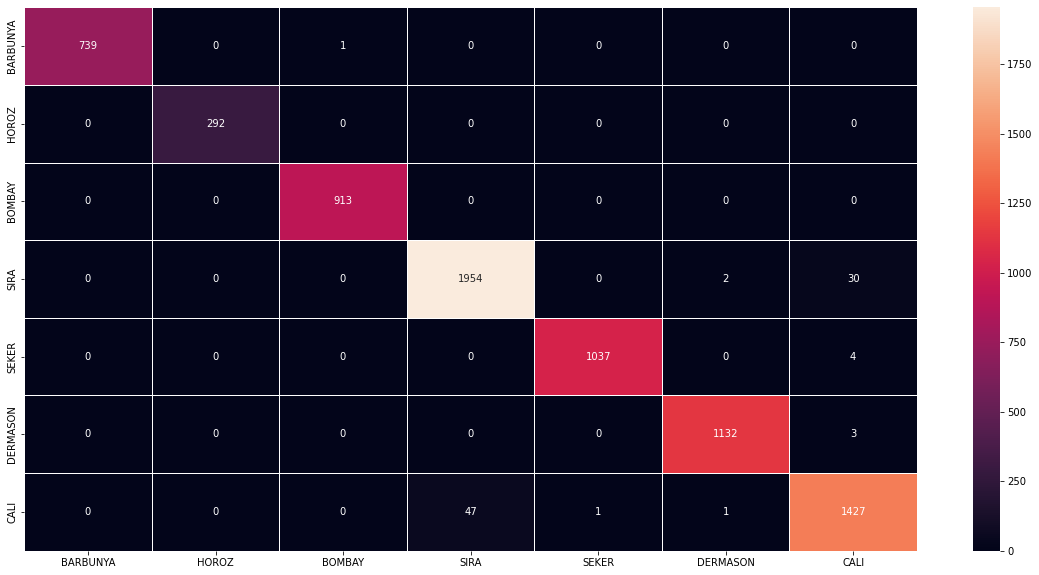

In [21]:
y_pred_train=clf.predict(X_train)
print("classification report:\n\n",classification_report(y_train, y_pred_train)) 

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train,y_pred_train)
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(conf_mx,annot=True,fmt='g',linewidths=.5,ax=ax,xticklabels=set(y_pred_train),yticklabels=set(y_pred_train))
plt.show()

classification report:

               precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.94       317
      BOMBAY       1.00      1.00      1.00       126
        CALI       0.94      0.94      0.94       391
    DERMASON       0.90      0.92      0.91       851
       HOROZ       0.95      0.96      0.96       447
       SEKER       0.97      0.93      0.95       486
        SIRA       0.86      0.88      0.87       633

    accuracy                           0.92      3251
   macro avg       0.94      0.94      0.94      3251
weighted avg       0.93      0.92      0.92      3251



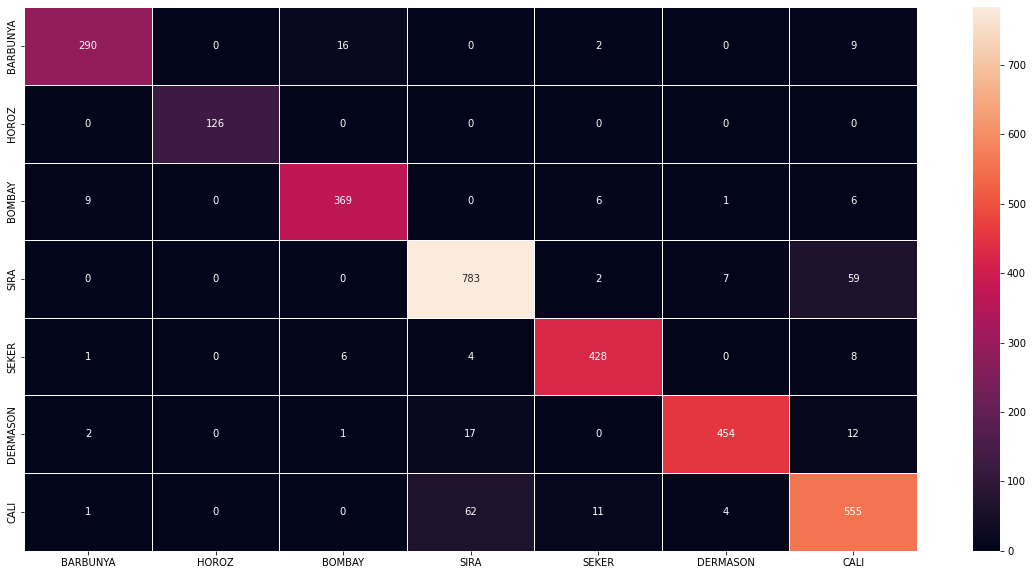

In [23]:
y_pred_test=clf.predict(X_test)
print("classification report:\n\n",classification_report(y_test, y_pred_test)) 

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test,y_pred_test)
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(conf_mx,annot=True,fmt='g',linewidths=.5,ax=ax,xticklabels=set(y_pred_test),yticklabels=set(y_pred_test))
plt.show()

### RandomForestClassifier

In [24]:
param_grid={
    "n_estimators":np.arange(10,1015,20),
    "max_depth":np.arange(1,20),
    "max_samples":np.arange(10,5000,50),
    "criterion":["gini","entropy"]
    }
n_trees=50
forest_clf = RandomForestClassifier(class_weight=a_dictionary)

RS_CV=RandomizedSearchCV(estimator=forest_clf,param_distributions=param_grid,
                                      n_iter=10,cv=5,
                                      verbose=2,n_jobs=-1,random_state=42,scoring='f1_micro')

RS_CV.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={'BARBUNYA': 1.4642519259359372,
                                                                  'BOMBAY': 1.186897458369851,
                                                                  'CALI': 0.7338616812301023,
                                                                  'DERMASON': 0.9547898122851856,
                                                                  'HOROZ': 3.702665755297334,
                                                                  'SEKER': 1.0401305683563749,
                                                                  'SIRA': 0.5455461000050355}),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,...
       3860, 3910, 3960, 4010, 4060, 4110, 4160, 4210, 4260, 4310, 4360,
       4410, 4460, 4510, 4560, 4610, 4660, 4710, 4760, 48

classification report:

               precision    recall  f1-score   support

    BARBUNYA       1.00      0.99      0.99       740
      BOMBAY       1.00      1.00      1.00       292
        CALI       0.99      1.00      1.00       913
    DERMASON       0.98      0.99      0.99      1986
       HOROZ       0.99      0.99      0.99      1041
       SEKER       1.00      1.00      1.00      1135
        SIRA       0.99      0.97      0.98      1476

    accuracy                           0.99      7583
   macro avg       0.99      0.99      0.99      7583
weighted avg       0.99      0.99      0.99      7583



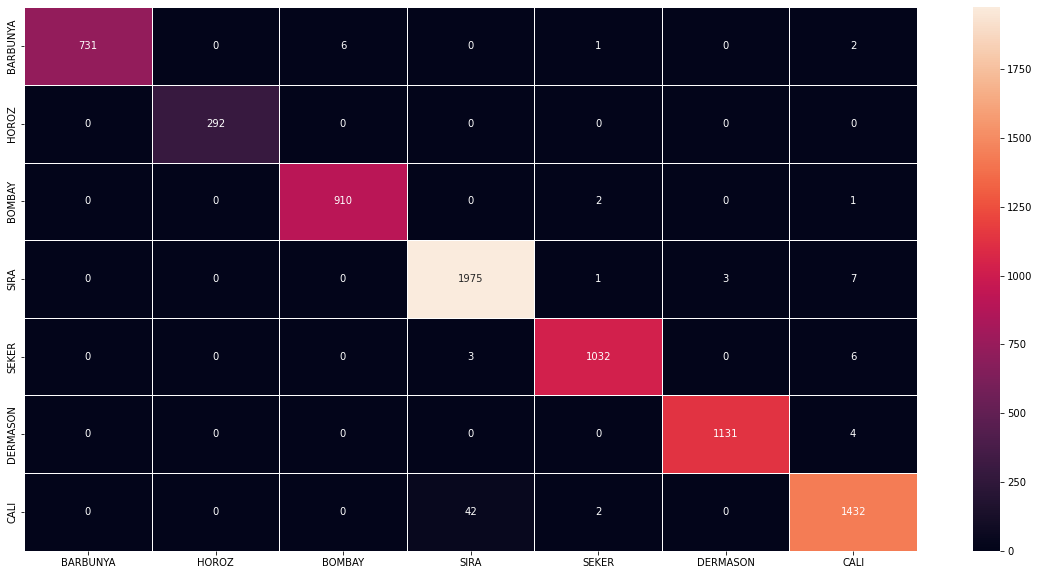

In [25]:
y_pred_train=RS_CV.predict(X_train)
print("classification report:\n\n",classification_report(y_train, y_pred_train)) 

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train,y_pred_train)
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(conf_mx,annot=True,fmt='g',linewidths=.5,ax=ax,xticklabels=set(y_pred_train),yticklabels=set(y_pred_train))
plt.show()

classification report:

               precision    recall  f1-score   support

    BARBUNYA       0.96      0.89      0.92       317
      BOMBAY       1.00      1.00      1.00       126
        CALI       0.92      0.94      0.93       391
    DERMASON       0.90      0.94      0.92       851
       HOROZ       0.95      0.95      0.95       447
       SEKER       0.96      0.94      0.95       486
        SIRA       0.87      0.87      0.87       633

    accuracy                           0.92      3251
   macro avg       0.94      0.93      0.93      3251
weighted avg       0.92      0.92      0.92      3251



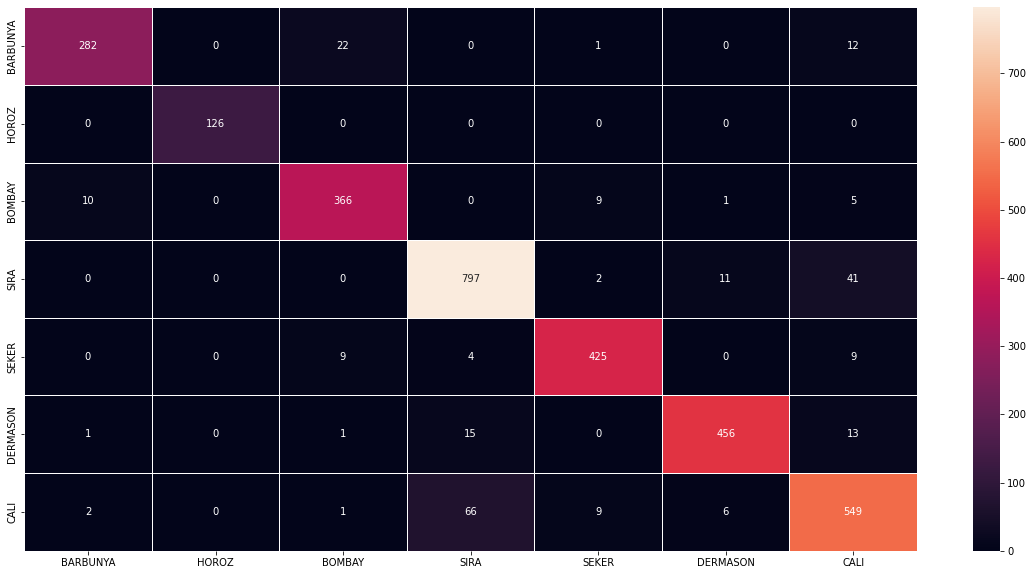

In [27]:
y_pred_test=RS_CV.predict(X_test)
print("classification report:\n\n",classification_report(y_test, y_pred_test)) 

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test,y_pred_test)
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(conf_mx,annot=True,fmt='g',linewidths=.5,ax=ax,xticklabels=set(y_pred_test),yticklabels=set(y_pred_test))
plt.show()

# Test Data

In [29]:
test_df = pd.read_csv(os.path.join(DATA_PATH,'test.csv'))

columns_to_drop  = ['Area','EquivDiameter','ShapeFactor3','Perimeter','AspectRation'
                   ,'MinorAxisLength','Compactness','ID']

test  = test_df.drop(columns_to_drop,axis=1)
test_scaled=scaler.transform(test)

In [30]:

y_test_predicted = RS_CV.predict(test_scaled)

test_df['y'] = y_test_predicted

test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [31]:
test_df['y'].value_counts()

DERMASON    737
SIRA        515
SEKER       399
HOROZ       374
CALI        326
BARBUNYA    254
BOMBAY      104
Name: y, dtype: int64

In [32]:
test_df[['ID', 'y']].to_csv('submission.csv', index=False)
